In [1]:
import pandas as pd
import numpy as np
from astropy import coordinates as coord
from astropy import units as u


In [2]:
EXOcsv = "../../exo.csv"
NASAcsv = "../../nasaexo.csv"
SCcsv = "../download/SWEETCAT_Dataframe.csv"
dtype_SW = {'gaia_dr2':'int64','gaia_dr3':'int64'}

exo = pd.read_csv(EXOcsv)
exo = exo[(exo.detection_type == 'Radial Velocity') | (exo.detection_type == 'Primary Transit') | (exo.detection_type == 'Astrometry')]
exo = exo.reset_index()
nasa = pd.read_csv(NASAcsv)
SC = pd.read_csv(SCcsv, dtype=dtype_SW)
print(f"lines in exo: {len(exo)}")
print(f"lines in NASA: {len(nasa)}")
print(f"lines in SC: {len(SC)}")

lines in exo: 4526
lines in NASA: 4935
lines in SC: 3674


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (153,183,187,206,211) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dic = {'name':'pl_name','planet_status':'','mass':'pl_bmassj',
       'mass_error_min':'pl_bmassjerr2','mass_error_max':'pl_bmassjerr1',
       'mass_sini':'pl_msinij','mass_sini_error_min':'pl_msinijerr2',
       'mass_sini_error_max':'pl_msinijerr1',
       'radius':'pl_radj', 'radius_error_min':'pl_radjerr2', 
       'radius_error_max':'pl_radjerr1', 'orbital_period':'pl_orbper', 
       'orbital_period_error_min':'pl_orbpererr2', 'orbital_period_error_max':'pl_orbpererr1', 
       'semi_major_axis':'pl_orbsmax', 'semi_major_axis_error_min':'pl_orbsmaxerr2', 
       'semi_major_axis_error_max':'pl_orbsmaxerr1', 'eccentricity':'pl_orbeccen', 
       'eccentricity_error_min':'pl_orbeccenerr2', 'eccentricity_error_max':'pl_orbeccenerr1', 
       'inclination':'pl_orbincl', 'inclination_error_min':'pl_orbinclerr2', 
       'inclination_error_max':'pl_orbinclerr1', 'angular_distance':'', 'discovered':'', 
       'updated':'rowupdate', 'omega':'', 'omega_error_min':'', 
       'omega_error_max':'', 'tperi':'', 'tperi_error_min':'', 'tperi_error_max':'', 
       'tconj':'', 'tconj_error_min':'', 'tconj_error_max':'', 'tzero_tr':'', 'tzero_tr_error_min':'',
       'tzero_tr_error_max':'', 'tzero_tr_sec':'', 'tzero_tr_sec_error_min':'',
       'tzero_tr_sec_error_max':'', 'lambda_angle':'', 'lambda_angle_error_min':'',
       'lambda_angle_error_max':'', 'impact_parameter':'',
       'impact_parameter_error_min':'', 'impact_parameter_error_max':'', 'tzero_vr':'',
       'tzero_vr_error_min':'', 'tzero_vr_error_max':'', 'k':'', 'k_error_min':'',
       'k_error_max':'', 'temp_calculated':'', 'temp_calculated_error_min':'',
       'temp_calculated_error_max':'', 'temp_measured':'', 'hot_point_lon':'',
       'geometric_albedo':'', 'geometric_albedo_error_min':'',
       'geometric_albedo_error_max':'', 'log_g':'', 'publication':'', 'detection_type':'discoverymethod',
       'mass_detection_type':'', 'radius_detection_type':'', 'alternate_names':'',
       'molecules':'', 'star_name':'hostname', 'ra':'ra', 'dec':'dec', 'mag_v':'', 'mag_i':'', 'mag_j':'',
       'mag_h':'', 'mag_k':'', 'star_distance':'sy_dist', 'star_distance_error_min':'sy_disterr2',
       'star_distance_error_max':'sy_disterr1', 'star_metallicity':'',
       'star_metallicity_error_min':'', 'star_metallicity_error_max':'', 'star_mass':'st_mass',
       'star_mass_error_min':'st_masserr2', 'star_mass_error_max':'st_masserr1', 'star_radius':'st_rad',
       'star_radius_error_min':'st_raderr2', 'star_radius_error_max':'st_raderr1', 'star_sp_type':'',
       'star_age':'', 'star_age_error_min':'', 'star_age_error_max':'', 'star_teff':'st_teff',
       'star_teff_error_min':'st_tefferr2', 'star_teff_error_max':'st_tefferr1', 'star_detected_disc':'',
       'star_magnetic_field':'', 'star_alternate_names':''}

# Change columns' names to be equal to EU (more readable names)
old_col=[val for key,val in dic.items() if val!='']
new_col =[key for key,val in dic.items() if val!='']
nasa_eu = nasa.rename(columns=dict(zip(old_col, new_col)))

In [4]:
for key, val in dic.items():
    if val not in nasa.columns:
        print(val)

In [4]:
#Check if column is in nasa_eu
"name" in nasa_eu.columns
dict(zip(old_col, new_col))
"mass_sini" in nasa_eu.columns

True

In [5]:
#Getting coordinates matching
coordSC     = coord.SkyCoord(ra=SC['RA'].values,
                           dec=SC['DEC'].values,
                           unit=(u.hourangle, u.deg),
                           frame='icrs')
coordSCEU   = coord.SkyCoord(ra=SC['RA_EU'].values,
                           dec=SC['DEC_EU'].values,
                           unit=(u.deg, u.deg),
                           frame='icrs')
coordSCNASA = coord.SkyCoord(ra=SC['RA_NASA'].values,
                           dec=SC['DEC_NASA'].values,
                           unit=(u.deg, u.deg),
                           frame='icrs')
coordExo    = coord.SkyCoord(ra=exo['ra'].values,
                           dec=exo['dec'].values,
                           unit=(u.deg, u.deg),
                           frame='icrs')
coordNasa   = coord.SkyCoord(ra=nasa_eu['ra'].values,
                           dec=nasa_eu['dec'].values,
                           unit=(u.deg, u.deg),
                           frame='icrs')



/usr/lib/python3/dist-packages/astropy/coordinates/angles.py:522: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/usr/lib/python3/dist-packages/astropy/coordinates/angles.py:522: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [6]:
SCind = np.where(SC.Name == "TOI-837")[0][0]
print(SCind)
#SCind = 3001
def get_planets_for_SC_star(SCind):
    outres = []
    #print("Planets for:", SC.Name[SCind], SC.Database[SCind], SC.RA_EU[SCind])
    if "EU" in SC.Database[SCind]:
        sep = coordSCEU[SCind].separation(coordExo).arcsecond
        ind = np.where(sep <= np.nanmin(sep))[0]
        if len(ind) > 0:
            #print(ind)
            #print("EU Planets:")
            #print(exo.loc[ind,["name", "mass", "mass_sini", "radius", "semi_major_axis", "eccentricity"]])
            outres = exo.loc[ind]
    else:
        sep2 = coordSCNASA[SCind].separation(coordNasa).arcsecond
        ind2 = np.where(sep2 <= np.nanmin(sep2))[0]
        if len(ind2) > 0:
            #print(ind2)
            #print("NASA Planets:")
            #print(nasa.loc[ind2,["pl_name", "pl_massj","pl_msinij","pl_radj", "pl_orbsmax", "pl_orbeccen","hostname"]])
            outres = nasa_eu.loc[ind2]
    return outres
get_planets_for_SC_star(SCind)[["name", "mass", "mass_sini", "radius", "semi_major_axis", "eccentricity"]]

3233


,name,mass,mass_sini,radius,semi_major_axis,eccentricity
1944,TOI-837 b,1.2,1.2,0.77,NaN,0.0


In [7]:
#Check matching of all lines in SC
count = 0
for i in range(len(SC)):
    res = get_planets_for_SC_star(i)
    if len(res) < 1:
        print(i,SC.Name[i], SC.Database[i])
        count +=1
if count > 0:
    print("Problem with SC link coords")
else:
    print("OK")

OK


## Check Metallicity Correlations

In [8]:
# some useful functions


def get_mass_taken(row):
  if row['mass'] > 0:
    return row['mass']
  if row['mass_sini'] > 0:
    return row['mass_sini']
  return None

def get_mass_taken_error(row):
  if row['mass'] > 0:
    return row['mass_error_max']
  if row['mass_sini'] > 0:
    return row['mass_sini_error_max']
  return None

In [9]:
planets = get_planets_for_SC_star(10)
planets[['orbital_period', 'orbital_period_error_min','orbital_period_error_max']]

,orbital_period,orbital_period_error_min,orbital_period_error_max
26,269.3,1.96,1.96


In [ ]:
#create planets dataframe
load = False
if load:
    data = pd.read_csv("data_new.csv")
else:
    column_names = ["name","swname", "mass", "mass_error_max","mass_sini", "mass_sini_error_max", "mass_taken", "mass_taken_error", "orbital_period", "orbital_period_error_max", "orbital_period_error_min", "swfeh", "swefeh", "swteff", "pl_source","swsource", "swMass"]
    data = pd.DataFrame([], columns =column_names)
    for i in range(len(SC)):
        planets = get_planets_for_SC_star(i)
        planets["mass_taken"] = planets.apply(lambda row: get_mass_taken(row), axis=1)
        planets["mass_taken_error"] = planets.apply(lambda row: get_mass_taken_error(row), axis=1)
        planets["swname"] = SC.Name[i]
        planets["swfeh"] = SC["[Fe/H]"][i]
        planets["swefeh"] = SC["e[Fe/H]"][i]
        planets["swteff"] = SC.Teff[i]
        planets["pl_source"] = "EU"
        planets["swsource"] = SC.SWFlag[i]
        planets["swMass"] = SC.Mass_t[i]
        dtmp = planets[column_names]
        data = data.append(dtmp, ignore_index=True)
    data.to_csv("data_new.csv", index=False, header=True)
        


In [12]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
px  = 1/plt.rcParams['figure.dpi']  # pixel in inches

In [13]:
from scipy import stats
def plot_feh_dist2(data_rdb, mass_sep = 30., field_mass= 'mass_taken', homog=True):


#    period = np.array([ -1 if p =='nan' else float(p) for p in data_rdb['period']])
#    period = np.array([ -1 if p =='nan' else float(p) for p in data_rdb['orbital_period']])
#    data_homog = data_rdb[np.where(  (data_rdb['source'] == 1) & (period >= 100) & (period < 10000000)    )]

  data_homog = data_rdb[data_rdb['swsource'] == 1]
  data_set = data_rdb
#    print "full set"
  if homog:
    data_set = data_homog

  mass_earth = 1. / 317.8  #jupiter masses
  mass_split = mass_sep * mass_earth


  print (len(data_set), "number of planets in data set")
  print (len(np.where(data_set['swfeh'].astype(float) > -9.)[0]), "number of planets with feh")
  print (len(np.where(data_set['mass_taken'].astype(float) > -9.)[0]), "number of planets with mass")

  feh_lowm = data_set[data_set[field_mass] < mass_split]['swfeh']
  feh_lowm = feh_lowm[feh_lowm>-9]
  print (len(feh_lowm), "planets lower mass")

  feh_highm = data_set[data_set[field_mass] >= mass_split]['swfeh']
  feh_highm = feh_highm[feh_highm > -9]
  print (len(feh_highm), "planets higher mass")

#    color_b = (0./255.,107./255.,164./255.)
#    color_b = (255./255.,255./255., 100./255.)
  color_b = (205./255.,205./255., 0./255.)
#    color_r = (255./255.,128./255.,14./255.)
  color_r = (170./255., 110./255., 40./255.)


  #plt.style.use('seaborn-darkgrid')
  fig = plt.figure(figsize=(1200*px,400*px))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  ax1.hist(feh_highm, bins=np.arange(-1.0, 0.6, 0.1), color = color_r, alpha=0.5, density=True, label = "HMP", ec='black')
  ax1.hist(feh_lowm, bins=np.arange(-1.0, 0.6, 0.1), color = color_b, alpha=0.5, density=True, label = "LMP", ec='black')

  ax1.axvline(np.median(feh_highm), color=color_r, linestyle ='--')
  ax1.axvline(np.median(feh_lowm), color=color_b, linestyle ='--')
  ax1.set_xlabel('Stellar metallicity [Fe/H]')
  ax1.set_ylabel('Planet Frequency')
#    fig.suptitle("Distribution per planets", fontsize=16)
  ax1.legend(loc=2, fontsize=20)

  ax2.hist(feh_highm, bins=np.arange(-1.0, 0.6, 0.001), color = color_r, alpha=0.5, density=True, label = "HMP", histtype='step', cumulative=True, linewidth = 3, linestyle ='--')
  ax2.hist(feh_lowm, bins=np.arange(-1.0, 0.6, 0.001), color = color_b, alpha=0.5, density=True, label = "LMP"  , histtype='step', cumulative=True, linewidth = 3)
  ax2.set_xlabel('Stellar metallicity [Fe/H]')
  ax2.set_ylabel('Planet Frequency CDF')
  ax2.legend(loc=2, fontsize=20)
  ax2.set_ylim(0,1)
  ax1.set_xlim(-1,0.55)
  ax2.set_xlim(-1,0.55)
  ad_test = stats.anderson_ksamp([feh_highm,feh_lowm])
  ks_test = stats.ks_2samp(feh_highm,feh_lowm)
  print("Statistics for planet-hosts samples")
  print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue))
  print("mean difference:", np.mean(feh_highm)-np.mean(feh_lowm))
  for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(20)

  # ax2.text(0.02,0.75,"A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level),transform=ax2.transAxes)
  # ax2.text(0.02,0.70,"K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue),transform=ax2.transAxes)
  fig.tight_layout()
  fig.savefig("feh_dist_planets.png")
  plt.show()


#compare with: https://arxiv.org/pdf/1810.08108.pdf

1237 number of planets in data set
1237 number of planets with feh
1120 number of planets with mass
231 planets lower mass
889 planets higher mass
Statistics for planet-hosts samples
A-D statistic: 45.07; p-value: 1.00e-03
K-S statistic:  0.29; p-value: 2.83e-14
mean difference: 0.1337341923168695


<ipython-input-13-2234d90e8eca>:61: UserWarning: p-value floored: true value smaller than 0.001
  ad_test = stats.anderson_ksamp([feh_highm,feh_lowm])


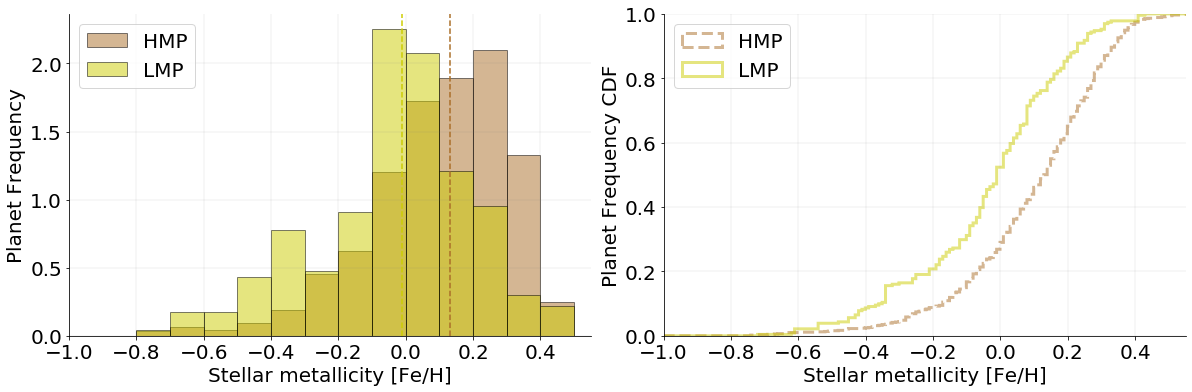

In [14]:
#compare with: https://arxiv.org/pdf/1810.08108.pdf
plot_feh_dist2(data)

In [15]:
sn = data.swname[607]
maxmass = np.max(data[data.swname == sn].mass_taken)
print(maxmass)
data[data.swname == sn].mass_taken


0.34


607    0.01343
608    0.01246
609    0.05236
610    0.22300
611    0.03400
612    0.34000
Name: mass_taken, dtype: float64

In [16]:
coralie_data = pd.read_csv('/home/sousasag/Investigador/papers/paper8_sweet_cat/paper/prog/data/planeta_coralie_full_feh_tot.rdb', delimiter='\t', skiprows=(1,))
coralie_data

,code,bv,nmes,wmoy,lll,feh,fehs,planet,ref
0,HD224752,0.78,5,2.040,3,-0.216883,-0.216883,no,no
1,HD224789,0.86,4,2.538,1,0.034925,-0.030000,no,harps451
2,HD224828,0.64,3,1.436,1,-0.476012,-0.476012,no,no
3,HD224908,0.62,2,1.374,3,-0.488541,-0.488541,no,no
4,HD225118,0.78,6,2.497,1,0.191927,0.191927,no,no
...,...,...,...,...,...,...,...,...,...
1248,HD224228,0.97,9,2.787,1,0.043460,0.043460,no,no
1249,HD224383,0.64,4,1.841,1,0.026450,0.026450,no,no
1250,HD224393,0.61,4,1.365,1,-0.462312,-0.380000,no,harps451
1251,HD224607,1.04,4,2.688,1,-0.096217,-0.096217,no,no


In [17]:
def read_feh_sousa_2011():
    coralie_data = pd.read_csv('/home/sousasag/Investigador/papers/paper8_sweet_cat/paper/prog/data/planeta_coralie_full_feh_tot.rdb', delimiter='\t', skiprows=(1,))
    program2_data = pd.read_csv('/home/sousasag/Investigador/papers/paper8_sweet_cat/paper/prog/data/program2.rdb', delimiter='\t', skiprows=(1,))
    feh_cor = np.array(coralie_data[coralie_data['feh'] < 0.6]['feh'])
    feh_prog2 = np.array(program2_data['feh  '])
    return  np.concatenate((feh_cor, feh_prog2))
feh_stars = read_feh_sousa_2011()
print(len(feh_stars))

1829


homogeneous set


<ipython-input-18-8aa412e5e80b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set.max_mass[i] = True


870 number of planet hosts
1237 numbers of planets
870 number of planets in data set
870 number of planets with feh
870 number of planets with mass
99 planets lower mass
771 planets higher mass
Statistics for planet-hosts samples
K-S statistic:  0.35; p-value: 4.03e-10
mean difference: 0.16837204732146369
Statistics for stars vs LMPH samples
K-S statistic:  0.09; p-value: 3.55e-01
mean difference: 0.03378200744076852
Statistics for stars vs HMPH samples
K-S statistic:  0.39; p-value: 2.44e-15
mean difference: 0.2021540547622322


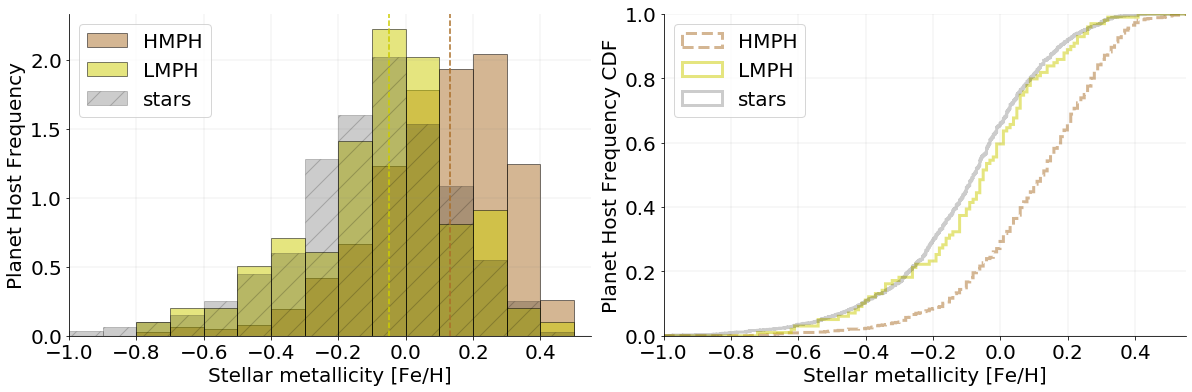

In [18]:
def plot_feh_dist_stars(data_rdb, homog=True, mid=0, mass_sep=30., field_mass='mass_taken'):
  data_rdb = data_rdb.sort_values(by=['swname'])
  data_homog = data_rdb[data_rdb['swsource'] == 1]

  data_set = data_rdb.copy()
  if homog:
    data_set = data_homog
    print ("homogeneous set")

  data_set = data_set.reset_index()
  data_set["max_mass"] = [False] * len(data_set)

  for i in range(len(data_set)):
    sn = data_set.swname[i]
    maxmass = np.max(data_set[data_set.swname == sn].mass_taken)
    #print(sn, maxmass)
    if data_set.mass_taken[i] == maxmass:
      data_set.max_mass[i] = True
  data_star = data_set[data_set.max_mass].reset_index()
  print (len(data_star), "number of planet hosts")
  print (len(data_set), "numbers of planets")
    

  data_set = data_star
  mass_earth = 1. / 317.8  #jupiter masses
  mass_split = mass_sep * mass_earth


  print (len(data_set), "number of planets in data set")
  print (len(np.where(data_set['swfeh'].astype(float) > -9.)[0]), "number of planets with feh")
  print (len(np.where(data_set['mass_taken'].astype(float) > -9.)[0]), "number of planets with mass")

  feh_lowm = data_set[data_set[field_mass] < mass_split]['swfeh']
  feh_lowm = feh_lowm[feh_lowm>-9]
  print (len(feh_lowm), "planets lower mass")

  feh_highm = data_set[data_set[field_mass] >= mass_split]['swfeh']
  feh_highm = feh_highm[feh_highm > -9]
  print (len(feh_highm), "planets higher mass")

#    color_b = (0./255.,107./255.,164./255.)
#    color_b = (255./255.,255./255., 100./255.)
  color_b = (205./255.,205./255., 0./255.)
#    color_r = (255./255.,128./255.,14./255.)
  color_r = (170./255., 110./255., 40./255.)


  #plt.style.use('seaborn-darkgrid')
  fig = plt.figure(figsize=(1200*px,400*px))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  
  feh_stars = read_feh_sousa_2011()
  ax1.hist(feh_highm, bins=np.arange(-1.0, 0.6, 0.1), color = color_r, alpha=0.5, density=True, label = "HMPH", ec='black')
  ax1.hist(feh_lowm, bins=np.arange(-1.0, 0.6, 0.1), color = color_b, alpha=0.5, density=True, label = "LMPH", ec='black')
  ax1.hist(feh_stars, bins=np.arange(-1.0, 0.6, 0.1), color = 'k', alpha=0.2, density=True, label = "stars", ec='black', hatch='/')

  ax1.axvline(np.median(feh_highm), color=color_r, linestyle ='--')
  ax1.axvline(np.median(feh_lowm), color=color_b, linestyle ='--')
  ax1.set_xlabel('Stellar metallicity [Fe/H]')
  ax1.set_ylabel('Planet Host Frequency')
#    fig.suptitle("Distribution per planets", fontsize=16)
  ax1.legend(loc=2, fontsize=20)

  ax2.hist(feh_highm, bins=np.arange(-1.0, 0.6, 0.001), color = color_r, alpha=0.5, density=True, label = "HMPH", histtype='step', cumulative=True, linewidth = 3, linestyle ='--')
  ax2.hist(feh_lowm, bins=np.arange(-1.0, 0.6, 0.001), color = color_b, alpha=0.5, density=True, label = "LMPH"  , histtype='step', cumulative=True, linewidth = 3)
  ax2.hist(feh_stars, bins=np.arange(-1.0, 0.6, 0.001), color = 'k', alpha=0.2, density=True, label = "stars"  , histtype='step', cumulative=True, linewidth = 3)

  ax2.set_xlabel('Stellar metallicity [Fe/H]')
  ax2.set_ylabel('Planet Host Frequency CDF')
  ax2.legend(loc=2, fontsize=20)
  ax2.set_ylim(0,1)
  ax1.set_xlim(-1,0.55)
  ax2.set_xlim(-1,0.55)

    
  for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(20)

  #ad_test = stats.anderson_ksamp([feh_highm,feh_lowm])
  ks_test = stats.ks_2samp(feh_highm,feh_lowm)
  print("Statistics for planet-hosts samples")
  #print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue))
  print("mean difference:", np.mean(feh_highm)-np.mean(feh_lowm))

  #ad_test2 = stats.anderson_ksamp([feh_stars,feh_lowm])
  ks_test2 = stats.ks_2samp(feh_stars,feh_lowm)
  print("Statistics for stars vs LMPH samples")
  #print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test2.statistic, ad_test2.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test2.statistic, ks_test2.pvalue))
  print("mean difference:", np.mean(feh_lowm)-np.mean(feh_stars))
    
  #ad_test3 = stats.anderson_ksamp([feh_stars,feh_highm])
  ks_test3 = stats.ks_2samp(feh_stars,feh_highm)
  print("Statistics for stars vs HMPH samples")
  #print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test3.statistic, ad_test3.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test3.statistic, ks_test3.pvalue))
  print("mean difference:", np.mean(feh_highm)-np.mean(feh_stars))

  # ax2.text(0.02,0.75,"A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level),transform=ax2.transAxes)
  # ax2.text(0.02,0.70,"K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue),transform=ax2.transAxes)
  fig.tight_layout()
  fig.savefig("feh_dist_stars.png")
  plt.show()
  return 

plot_feh_dist_stars(data)


0.5
230
290
0.09777061469265365
Statistics for planet-hosts samples
A-D statistic: 17.72; p-value: 1.00e-03
K-S statistic:  0.19; p-value: 9.81e-05
mean difference: 0.09777061469265365
Statistics for planet-hosts samples
A-D statistic: 30.81; p-value: 1.00e-03
K-S statistic:  0.32; p-value: 1.97e-12
mean difference: -0.4852034677661172


<ipython-input-19-582d4ef24aa0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100
<ipython-input-19-582d4ef24aa0>:51: UserWarning: p-value floored: true value smaller than 0.001
  ad_test = stats.anderson_ksamp([data_hotm.swfeh,data_coldm.swfeh])
<ipython-input-19-582d4ef24aa0>:75: UserWarning: p-value floored: true value smaller than 0.001
  ad_test = stats.anderson_ksamp([data_hotm.mass_taken,data_coldm.mass_taken])


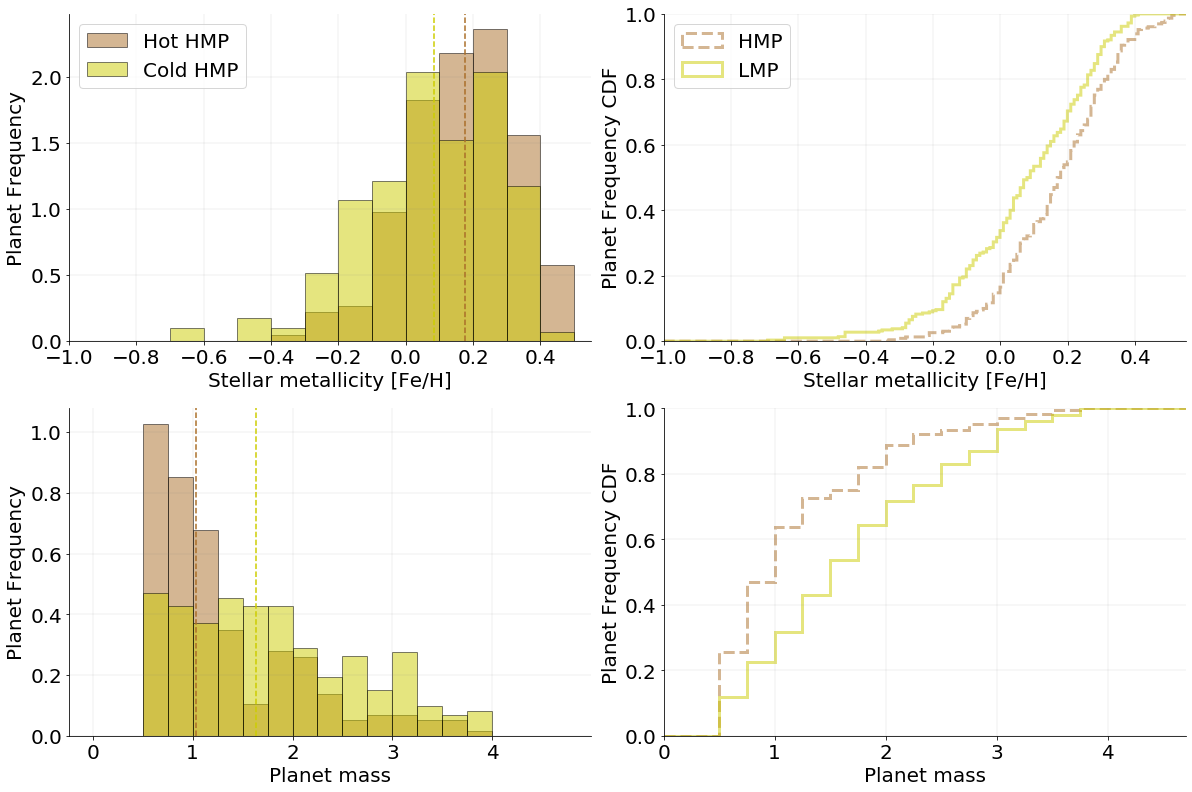

In [19]:
def hot_vs_cold_massive_planets(data_rdb, homog=1, msplit=30, psplit=40 , color_choice=1, field_mass="mass_taken", field_period='orbital_period', mass_error_perc=100):
  data_homog = data_rdb[data_rdb['swsource'] == 1]

  data_set = data_rdb
  if homog:
    data_set = data_homog

  mass_earth = 1. / 317.8  #jupiter masses
  mass_split = msplit * mass_earth
  msplit = mass_split
  msplit = 0.5
  print(msplit)
  msplit_o = 4
  data_set = data_set[ (data_set['swteff']>4500) & (data_set['swfeh'].notnull()) & (data_set[field_mass].notnull())]
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100
    
  data_hotm = data_set[(data_set[field_mass] >= msplit) & (data_set[field_mass] < msplit_o) & (data_set[field_period] < psplit) & (data_set["er_mass_per"] < mass_error_perc)]
#  data_highm = data_set[np.where(data_set[field_mass] >= mass_split)]
  data_coldm = data_set[(data_set[field_mass] >= msplit) & (data_set[field_mass] < msplit_o) & (data_set[field_period] >= psplit)]
  print(len(data_hotm))
  print(len(data_coldm))
    
  color_b = (205./255.,205./255., 0./255.)
  color_r = (170./255., 110./255., 40./255.)

  fig = plt.figure(figsize=(1200*px,800*px))
  ax1 = fig.add_subplot(221)
  ax2 = fig.add_subplot(222)
  ax3 = fig.add_subplot(223)
  ax4 = fig.add_subplot(224)

  ax1.hist(data_hotm.swfeh, bins=np.arange(-1.0, 0.6, 0.1), color = color_r, alpha=0.5, density=True, label = "Hot HMP", ec='black')
  ax1.hist(data_coldm.swfeh, bins=np.arange(-1.0, 0.6, 0.1), color = color_b, alpha=0.5, density=True, label = "Cold HMP", ec='black')

  print(np.mean(data_hotm.swfeh)-np.mean(data_coldm.swfeh))
  ax1.axvline(np.median(data_hotm.swfeh), color=color_r, linestyle ='--')
  ax1.axvline(np.median(data_coldm.swfeh), color=color_b, linestyle ='--')
  ax1.set_xlabel('Stellar metallicity [Fe/H]')
  ax1.set_ylabel('Planet Frequency')
#    fig.suptitle("Distribution per planets", fontsize=16)
  ax1.legend(loc=2, fontsize=20)

  ax2.hist(data_hotm.swfeh, bins=np.arange(-1.0, 0.6, 0.001), color = color_r, alpha=0.5, density=True, label = "HMP", histtype='step', cumulative=True, linewidth = 3, linestyle ='--')
  ax2.hist(data_coldm.swfeh, bins=np.arange(-1.0, 0.6, 0.001), color = color_b, alpha=0.5, density=True, label = "LMP"  , histtype='step', cumulative=True, linewidth = 3)
  ax2.set_xlabel('Stellar metallicity [Fe/H]')
  ax2.set_ylabel('Planet Frequency CDF')
  ax2.legend(loc=2, fontsize=20)
  ax2.set_ylim(0,1)
  ax1.set_xlim(-1,0.55)
  ax2.set_xlim(-1,0.55)
  ad_test = stats.anderson_ksamp([data_hotm.swfeh,data_coldm.swfeh])
  ks_test = stats.ks_2samp(data_hotm.swfeh,data_coldm.swfeh)
  print("Statistics for planet-hosts samples")
  print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue))
  print("mean difference:", np.mean(data_hotm.swfeh)-np.mean(data_coldm.swfeh))

  ax3.hist(data_hotm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_r, alpha=0.5, density=True, label = "Hot HMP", ec='black')
  ax3.hist(data_coldm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_b, alpha=0.5, density=True, label = "Cold HMP", ec='black')

  ax3.axvline(np.median(data_hotm.mass_taken), color=color_r, linestyle ='--')
  ax3.axvline(np.median(data_coldm.mass_taken), color=color_b, linestyle ='--')
  ax3.set_xlabel('Planet mass')
  ax3.set_ylabel('Planet Frequency')
#    fig.suptitle("Distribution per planets", fontsize=16)

  ax4.hist(data_hotm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_r, alpha=0.5, density=True, label = "HMP", histtype='step', cumulative=True, linewidth = 3, linestyle ='--')
  ax4.hist(data_coldm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_b, alpha=0.5, density=True, label = "LMP"  , histtype='step', cumulative=True, linewidth = 3)
  ax4.set_xlabel('Planet mass')
  ax4.set_ylabel('Planet Frequency CDF')
  #ax4.legend(loc=2, fontsize=20)
  ax4.set_ylim(0,1)
  #ax1.set_xlim(-1,0.55)
  ax4.set_xlim(0,4.7)
  ad_test = stats.anderson_ksamp([data_hotm.mass_taken,data_coldm.mass_taken])
  ks_test = stats.ks_2samp(data_hotm.mass_taken,data_coldm.mass_taken)
  print("Statistics for planet-hosts samples")
  print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue))
  print("mean difference:", np.mean(data_hotm.mass_taken)-np.mean(data_coldm.mass_taken))

  for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(20)

  # ax2.text(0.02,0.75,"A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level),transform=ax2.transAxes)
  # ax2.text(0.02,0.70,"K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue),transform=ax2.transAxes)
  fig.tight_layout()
  fig.savefig("hot_cold_jupiters.png")
  plt.show()
    
    
    
    
hot_vs_cold_massive_planets(data)

In [20]:
data_set = data.copy()
field_mass='mass_taken'
field_period='orbital_period'
data_set2 = data_set[(data_set['swteff'] > 4500) & (~np.isnan(data_set['swfeh'])) & (~np.isnan(data_set[field_mass])) & (~np.isnan(data_set[field_period]))]
print(len(data_set2))
### in case of error with object, do the load to fix this...

1577


https://arxiv.org/pdf/1903.04937.pdf


In [21]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter

def plot_feh_mass_period_all(data_rdb, homog=1, field_mass='mass_taken', field_period='orbital_period'):

    cm = plt.cm.get_cmap('YlOrBr')
    color_b = (205./255.,205./255., 0./255.)
    color_r = (170./255., 110./255., 40./255.)

    data_homog = data_rdb[data_rdb['swsource'] == 1]
    print (len(data_homog), len(data_rdb))

    if homog == 1:
        data_set = data_homog
        print ("homogeneous set")
    else:
        data_set = data_rdb
        print ("full set")
    mass_earth = 1. / 317.8  #jupiter masses
    mass_split = 30. * mass_earth

#    data_set = data_set[np.where( (data_set['teff'] > 4500) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (~np.isnan(data_set[field_period])) )]
#    data_set = data_set[np.where( (data_set['teff'] > 4500) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (data_set['detection_type'] == "Radial Velocity") )]
#    data_set = data_set[np.where( (data_set['teff'] > 4500) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (data_set['detection_type'] == "Primary Transit") )]

    data_set = data_set[(data_set['swteff'] > 4500) & (~np.isnan(data_set['swfeh'])) & (~np.isnan(data_set[field_mass])) & (~np.isnan(data_set[field_period]))]

    print(len(data_set))

    data_lowm = data_set[data_set[field_mass] < mass_split]
    data_highm = data_set[data_set[field_mass] >= mass_split]

    fig = plt.figure(1, figsize=(12, 8))
    ax1 = plt.axes([0.1, 0.1, 0.60, 0.85])
    ax2 = plt.axes([0.72, 0.1, 0.23, 0.85])

    sc = ax1.scatter(data_set['swfeh'], data_set[field_period].astype(float), c=data_set[field_mass].astype(float)/mass_earth,cmap=cm, s=50, ec='k', norm= LogNorm(np.nanmin(data_set[field_mass])/mass_earth, np.nanmax(data_set[field_mass])/mass_earth))
    nullfmt = NullFormatter()         # no labels
    ax1.set_yscale('log')
    cbar = plt.colorbar(sc)
    ax1.set_xlabel('Stellar metallicity - [Fe/H] - (dex)')
    ax1.set_ylabel('Period (days)')
    bins= np.logspace(-1,5,45)
    ax2.set_yscale('log')



    ax2.hist(data_highm[field_period].astype(float), bins=bins, orientation='horizontal', color = color_r, alpha=0.5,ec='black', label='HMP (n: %d) ' % len(data_highm[field_period]))
    ax2.hist(data_lowm[field_period].astype(float), bins=bins, orientation='horizontal', color = color_b, alpha=0.5,ec='black', label='LMP: (n: %d) ' % len (data_lowm[field_period]))
    ax2.set_xlabel('Number of planets')
    ax2.yaxis.set_major_formatter(nullfmt)
    ax2.legend()
#    cbar.set_label(r'Planet Mass (M$_\mathrm{Jupiter}$)', rotation=90)
    cbar.set_label('Planet Mass ($M_{\oplus}$)', rotation=90)
    
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        ax.set_ylim([10**-1,10**5])
    plt.show()
    fig.savefig("mass_metallicity_plane_all.png")

1237 4384
homogeneous set
1091


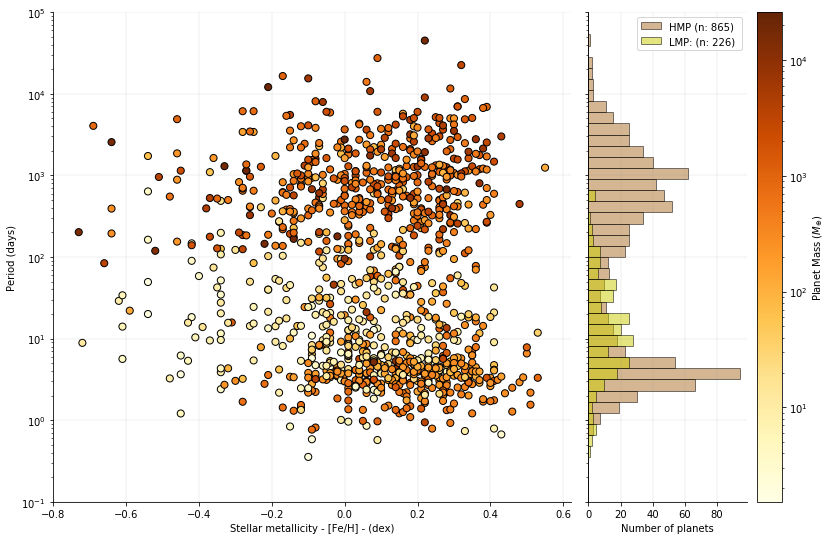

In [22]:
plot_feh_mass_period_all(data)

1237 4384
homogeneous set
[1.00000000e-01 1.36887451e-01 1.87381742e-01 2.56502091e-01
 3.51119173e-01 4.80638086e-01 6.57933225e-01 9.00628020e-01
 1.23284674e+00 1.68761248e+00 2.31012970e+00 3.16227766e+00
 4.32876128e+00 5.92553098e+00 8.11130831e+00 1.11033632e+01
 1.51991108e+01 2.08056754e+01 2.84803587e+01 3.89860370e+01
 5.33669923e+01 7.30527154e+01 1.00000000e+02 1.36887451e+02
 1.87381742e+02 2.56502091e+02 3.51119173e+02 4.80638086e+02
 6.57933225e+02 9.00628020e+02 1.23284674e+03 1.68761248e+03
 2.31012970e+03 3.16227766e+03 4.32876128e+03 5.92553098e+03
 8.11130831e+03 1.11033632e+04 1.51991108e+04 2.08056754e+04
 2.84803587e+04 3.89860370e+04 5.33669923e+04 7.30527154e+04
 1.00000000e+05]
1.6020599913279625


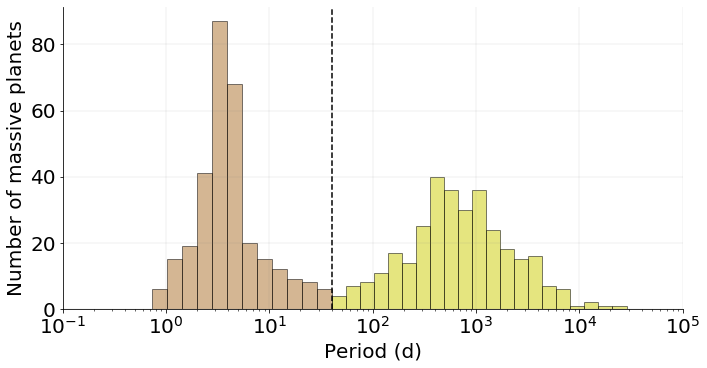

In [23]:
def plot_mass_period_hist(data_rdb, homog=1, field_mass='mass_taken', field_period='orbital_period'):

    cm = plt.cm.get_cmap('YlOrBr')
    color_b = (205./255.,205./255., 0./255.)
    color_r = (170./255., 110./255., 40./255.)

    data_homog = data_rdb[data_rdb['swsource'] == 1]
    print (len(data_homog), len(data_rdb))

    if homog == 1:
        data_set = data_homog
        print ("homogeneous set")
    else:
        data_set = data_rdb
        print ("full set")
    mass_earth = 1. / 317.8  #jupiter masses
    mass_split = 30. * mass_earth
    mass_split = 0.25
    mass_split_2 = 4
#    data_set = data_set[np.where( (data_set['teff'] > 4500) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (~np.isnan(data_set[field_period])) )]
#    data_set = data_set[np.where( (data_set['teff'] > 4500) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (data_set['detection_type'] == "Radial Velocity") )]
#    data_set = data_set[np.where( (data_set['teff'] > 4500) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (data_set['detection_type'] == "Primary Transit") )]

    data_set = data_set[(data_set['swteff'] > 4500) & (~np.isnan(data_set['swfeh'])) & (~np.isnan(data_set[field_mass])) & (~np.isnan(data_set[field_period]))]

    data_highm = data_set[(data_set[field_mass] >= mass_split) & (data_set[field_mass] <= mass_split_2)]

    fig = plt.figure(figsize=(800*px,400*px))
    ax1 = fig.add_subplot(111)

    bins= np.logspace(-1,5,45)
    print(bins)
    print(np.log10(40))
    bins1 = np.logspace(-1,np.log10(40),19)
    bins2 = np.logspace(np.log10(40),5,26)
    ax1.set_xscale('log')
#    ax1.hist(data_highm[field_period].astype(float), bins=bins, color = color_r, alpha=0.5,ec='black', label='HMP (n: %d) ' % len(data_highm[field_period]))
    ax1.hist(data_highm[field_period].astype(float), bins=bins1, color = color_r, alpha=0.5,ec='black', label='HMP (n: %d) ' % len(data_highm[field_period]))
    ax1.hist(data_highm[field_period].astype(float), bins=bins2, color = color_b, alpha=0.5,ec='black', label='HMP (n: %d) ' % len(data_highm[field_period]))
    ax1.set_ylabel('Number of massive planets')
    ax1.set_xlabel("Period (d)")
    ax1.axvline(40, color="k", linestyle ='--')
    #nullfmt = NullFormatter()
    #ax1.yaxis.set_major_formatter(nullfmt)
#    ax1.legend()
#    cbar.set_label(r'Planet Mass (M$_\mathrm{Jupiter}$)', rotation=90)
#    cbar.set_label('Planet Mass ($M_{\oplus}$)', rotation=90)
    
    for ax in [ax1]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        ax.set_xlim([10**-1,10**5])
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(20)
    plt.show()
    fig.tight_layout()
    fig.savefig("hmass_period_hist.png")
    
plot_mass_period_hist(data)

In [24]:
from scipy.optimize import curve_fit

def func_fit_lin(X, a, b, c):
    feh,period = X
    return a + b*feh + c*np.log10(period)


def plot_feh_mass_period_lowmass(data_rdb, homog=1, msplit=30, color_choice=1, field_mass="mass_taken", field_period='orbital_period', mass_error_perc=20):

#    period = np.array([ -1 if p =='nan' else float(p) for p in data_rdb['period']])
#    period = np.array([ -1 if p =='nan' else float(p) for p in data_rdb['orbital_period']])
#    data_homog = data_rdb[np.where(  (data_rdb['source'] == 1) & (period >= 100) & (period < 10000000)    )]

  data_homog = data_rdb[data_rdb['swsource'] == 1]

  data_set = data_rdb
  if homog:
    data_set = data_homog

  mass_earth = 1. / 317.8  #jupiter masses
  mass_split = msplit * mass_earth
#    data_set = data_set[np.where( (data_set['teff'] > 4000))]
#    data_set = data_set[np.where( (data_set['teff'] > 4000) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (data_set['orbital_period'] < 100) ) ]
#  data_set = data_set[np.where( (data_set['swteff'] > 4500) & (~np.isnan(data_set['swfeh'])) & (~np.isnan(data_set[field_mass])) )]
  data_set = data_set[ (data_set['swteff']>4500) & (data_set['swfeh'].notnull()) & (data_set[field_mass].notnull())]
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100

#  data_set.loc[:,"er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100
#  data_set["er_mass_per"] = data_set.apply(lambda row: row['mass_taken_error']/row['mass_taken']*100, axis=1)
  #er_mass_per[np.isnan(er_mass_per)] = 99.9
  #er_mass_per[np.where(er_mass_per > 99.9)] = 99.9

#    data_lowm = data_set[np.where(data_set[field_mass] < mass_split)]
#  data_lowm = data_set[np.where( (data_set[field_mass] < mass_split) & (er_mass_per < mass_error_perc) )]
  data_lowm = data_set[(data_set[field_mass] < mass_split) & (data_set["er_mass_per"] < mass_error_perc) & (data_set["mass_taken_error"] > 0.001)]
#  data_highm = data_set[np.where(data_set[field_mass] >= mass_split)]
  data_highm = data_set[data_set[field_mass] >= mass_split]

  print ("Oi number of planets", len(data_lowm))
  #print "number of RV planets", len(np.where(data_lowm['detection_type']=="Radial Velocity" )[0])
#  plt.style.use('seaborn-darkgrid')

  if color_choice == 1:
      color_b = (0./255.,107./255.,164./255.)
      color_r = (255./255.,128./255.,14./255.)
      cm = plt.cm.get_cmap('RdYlBu_r')
  else:
      color_b = (0./255.,107./255.,164./255.)
      color_r = (255./255.,128./255.,14./255.)
      cm = plt.cm.get_cmap('YlOrBr')

  fig = plt.figure(1, figsize=(600*px, 400*px))
  ax1 = fig.add_subplot(111)

  nullfmt = NullFormatter()         # no labels

  ax1.set_xlabel('Stellar metallicity [Fe/H]')
  ax1.set_ylabel('Period [days]')
  #ax1.set_title('LMP metallicity-period diagram')
  bins= np.logspace(-1,5,40)


  # 2D box car average
  bins_yimage=np.logspace(-1,5,13)
  bins_ximage=np.arange(-0.75,0.6,0.1)
  mean_max_image = np.zeros((len(bins_yimage), len(bins_ximage)))
  for i in range(len(bins_ximage)-1):
      for j in range(len(bins_yimage)-1):
          #bin_data = data_lowm[ np.where( (data_lowm['swfeh'] >= bins_ximage[i]) & (data_lowm['swfeh'] <= bins_ximage[i+1]) & (data_lowm[field_period] >= bins_yimage[j]) & (data_lowm[field_period] <= bins_yimage[j+1])     )]
          bin_data = data_lowm[(data_lowm['swfeh'] >= bins_ximage[i]) & (data_lowm["swfeh"] <= bins_ximage[i+1]) & (data_lowm[field_period] >= bins_yimage[j]) & (data_lowm[field_period] <= bins_yimage[j+1])]
          mean_max_image[j,i] = np.mean(bin_data[field_mass])
  mean_max_image /= mass_earth

  mean_max_image [mean_max_image == 0] = 'nan'

#   imshow does not work anymore with the correct extent...
#    sc2 = ax1.imshow(mean_max_image, extent=[-0.75, 0.65, 10**-1, 10**5.5], origin='lower',cmap= cm)

  # using now pcolormesh

  from matplotlib.colors import BoundaryNorm
  from matplotlib.ticker import MaxNLocator
  import numpy.ma as ma

  x, y = np.meshgrid(bins_ximage, bins_yimage)
  z = mean_max_image

  levels = MaxNLocator(nbins=15).tick_values(0, 30)
  norm = BoundaryNorm(levels, ncolors=cm.N, clip=True)
  Zm = ma.masked_invalid(z)
  sc2 = ax1.pcolormesh(x, y, Zm, cmap= cm, norm=norm)
#    sc2 = ax1.pcolormesh(x, y, Zm, cmap= cm, norm=norm,shading='gouraud')

  # overploting the points
  sc = ax1.scatter(data_lowm['swfeh'], data_lowm[field_period].astype(float), c=data_lowm[field_mass]/mass_earth,cmap=cm, s=50, ec='k')

  cbar = plt.colorbar(sc2)
  cbar.set_label('Planet Mass ($M_{\oplus}$)', rotation=90, fontsize=20)
  cbar.ax.tick_params(labelsize=20)
  ax1.set_ylim(10**-1, 10**3.5)
  ax1.set_xlim(-0.8, 0.5)
  ax1.set_yscale('log')

  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(False)
  ax1.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    
  # fitting the points with linear fit
  period_mean_bin=np.logspace(-0.75,4.75,12)
  feh_mean_bin=np.arange(-0.7, 0.6, 0.1)
  z = mean_max_image[:-1,:-1]

  # initial guesses for a,b,c:
  p0 = 6., 1., 1.
  res_fit= curve_fit(func_fit_lin, (data_lowm['swfeh'],data_lowm[field_period]), data_lowm[field_mass]/mass_earth, p0)
  print (res_fit)
  perr = np.sqrt(np.diag(res_fit[1]))
  print ("errors:", perr)

  # # with error on mass
  # plmass_error=data_lowm['mass_error_max']
  # plmass_error[plmass_error == 0] = 'nan'
  # plmass_error[np.isnan(plmass_error)] = data_lowm[field_mass][np.isnan(plmass_error)]*0.25
  # res_fit= curve_fit(func_fit_lin, (data_lowm['feh'],data_lowm[field_period]), data_lowm[field_mass]/mass_earth, p0, plmass_error)
  # print res_fit

  linex = np.arange(-0.6,0.41,0.01)
  liney = (10 - res_fit[0][0] - res_fit[0][1]*linex) / res_fit[0][2]
  ax1.plot(linex,10**liney, color='k', linewidth=3, linestyle='--')

  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(False)
  ax1.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(20)


  #calculating the R2 score
  fit_z = np.zeros((period_mean_bin.shape[0],feh_mean_bin.shape[0]))
  for i in range(len(feh_mean_bin)):
    for j in range(len(period_mean_bin)):
      fit_z[j,i] = func_fit_lin((feh_mean_bin[i],period_mean_bin[j]), res_fit[0][0],res_fit[0][1],res_fit[0][2])

  from sklearn.metrics import r2_score
#  fit_mass = []
#  for data_i in data_lowm.iterrows():
#    print(data_i)
#    print(data_i['swfeh'])
#    fit_mass.append(func_fit_lin((data_i['swfeh'],data_i[field_period]), res_fit[0][0],res_fit[0][1],res_fit[0][2]))

  fit_mass = [func_fit_lin((dx,dy), res_fit[0][0],res_fit[0][1],res_fit[0][2]) for dx,dy in zip(data_lowm['swfeh'], data_lowm[field_period])]


  coefficient_of_dermination = r2_score(data_lowm[field_mass]/mass_earth, fit_mass)

  print ("R2:", coefficient_of_dermination)

  fig.tight_layout()
  fig.savefig("low_mass_feh_period_diagram.png")
  plt.show()

<ipython-input-24-63169646d83e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100


Oi number of planets 131
(array([7.91046913, 9.82252853, 4.18129921]), array([[ 1.05897529, -0.20613416, -0.80833377],
       [-0.20613416,  4.05541641,  0.37444875],
       [-0.80833377,  0.37444875,  0.7724476 ]]))
errors: [1.02906525 2.01380645 0.87888998]
R2: 0.23040410106610054


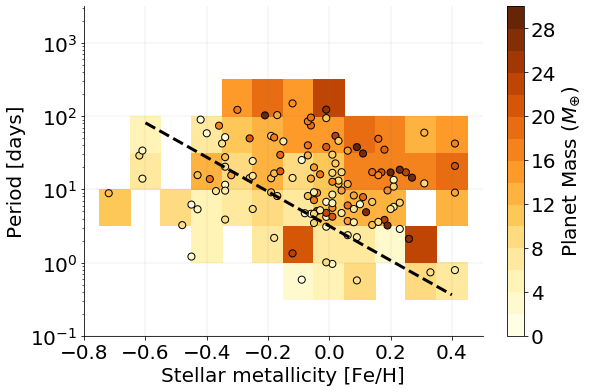

In [25]:
plot_feh_mass_period_lowmass(data, homog=True, msplit=30,color_choice=2, mass_error_perc=20)


In [26]:
data.columns

Index(['name', 'swname', 'mass', 'mass_error_max', 'mass_sini',
       'mass_sini_error_max', 'mass_taken', 'mass_taken_error',
       'orbital_period', 'orbital_period_error_max',
       'orbital_period_error_min', 'swfeh', 'swefeh', 'swteff', 'pl_source',
       'swsource', 'swMass'],
      dtype='object')

In [27]:
def best_fit_mass_period_lowmass(data_rdb, homog=1, msplit=30, color_choice=1, field_mass="mass_taken", field_period='orbital_period', mass_error_perc=20):

#    period = np.array([ -1 if p =='nan' else float(p) for p in data_rdb['period']])
#    period = np.array([ -1 if p =='nan' else float(p) for p in data_rdb['orbital_period']])
#    data_homog = data_rdb[np.where(  (data_rdb['source'] == 1) & (period >= 100) & (period < 10000000)    )]

  data_homog = data_rdb[data_rdb['swsource'] == 1]

  data_set = data_rdb
  if homog:
    data_set = data_homog

  mass_earth = 1. / 317.8  #jupiter masses
  mass_split = msplit * mass_earth
#    data_set = data_set[np.where( (data_set['teff'] > 4000))]
#    data_set = data_set[np.where( (data_set['teff'] > 4000) & (~np.isnan(data_set['feh'])) & (~np.isnan(data_set[field_mass])) & (data_set['orbital_period'] < 100) ) ]
#  data_set = data_set[np.where( (data_set['swteff'] > 4500) & (~np.isnan(data_set['swfeh'])) & (~np.isnan(data_set[field_mass])) )]
  data_set = data_set[ (data_set['swteff']>4500) & (data_set['swfeh'].notnull()) & (data_set[field_mass].notnull()) & (data_set["mass_taken_error"] > 0.001)]
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100

#  data_set.loc[:,"er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100
#  data_set["er_mass_per"] = data_set.apply(lambda row: row['mass_taken_error']/row['mass_taken']*100, axis=1)
  #er_mass_per[np.isnan(er_mass_per)] = 99.9
  #er_mass_per[np.where(er_mass_per > 99.9)] = 99.9

#    data_lowm = data_set[np.where(data_set[field_mass] < mass_split)]
#  data_lowm = data_set[np.where( (data_set[field_mass] < mass_split) & (er_mass_per < mass_error_perc) )]
  data_lowm = data_set[(data_set[field_mass] < mass_split) & (data_set["er_mass_per"] < mass_error_perc)]

  feh      = np.array(data_lowm.swfeh)
  erfeh    = np.array(data_lowm.swefeh)
  period   = np.array(data_lowm.orbital_period)
  erperiod = np.array(data_lowm.orbital_period_error_min)
  erperiod2 = np.array(data_lowm.orbital_period_error_max)
  mass_e   = np.array(data_lowm.mass_taken)/mass_earth
  ermassl  = np.array(data_lowm.mass_taken_error)/mass_earth

  return feh, erfeh, period, erperiod, erperiod2, mass_e, ermassl

feh, erfeh, period, erperiod, erperiod2, mass_e, ermassl = best_fit_mass_period_lowmass(data)


<ipython-input-27-6387e0e72d4e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100


In [28]:
max_p=0
for i, p in enumerate(period):
  if not np.isnan(erperiod[i]):
#    print(i,p,erperiod[i], erperiod[i]/p)
    
    if max_p < erperiod[i]/p:
      max_p = erperiod[i]/p
print(max_p)
for i, p in enumerate(period):
  if np.isnan(erperiod[i]):
    erperiod[i] = 0.05*p
#mass with 0..
print(len(period))

0.006
131


In [29]:
#test old fit
if False:
    import pickle
    # we open the file for reading
    #file_Name = "LMPs.dat"
    file_Name = "/home/sousasag/Dropbox/papers/paper8.2_sweet_cat/referee_report/prog/LMPs_top.dat"
    fileObject = open(file_Name,'rb')  
    # load the object from the file into var b
    a = pickle.load(fileObject, encoding='latin1')  
    fileObject.close()
    (feh, erfeh, period, erperiod, mass_e, ermassl, k_e_lowm , star_mass_lowm, res_fit) = a

In [30]:
ermassl

array([0.42903 , 0.50848 , 1.1123  , 2.5424  , 1.2712  , 2.2246  ,
       2.8602  , 1.08052 , 0.60382 , 2.199176, 1.900444, 1.81146 ,
       0.9534  , 0.9534  , 1.49366 , 2.278626, 2.5424  , 1.2712  ,
       2.2246  , 3.178   , 1.2712  , 0.66738 , 0.9534  , 1.52544 ,
       0.451276, 0.73094 , 0.7945  , 1.20764 , 1.9068  , 0.60382 ,
       0.73094 , 0.57204 , 1.30298 , 2.720368, 1.1123  , 3.8136  ,
       1.08052 , 3.158932, 0.98518 , 1.2712  , 1.68434 , 1.1123  ,
       1.20764 , 0.57204 , 0.46081 , 1.46188 , 1.81146 , 0.340046,
       0.340046, 1.2712  , 1.39832 , 0.7945  , 1.09641 , 0.38136 ,
       1.299802, 0.69916 , 2.82842 , 0.848526, 0.470344, 0.82628 ,
       0.44492 , 0.57204 , 0.60382 , 2.51062 , 1.589   , 0.57204 ,
       0.60382 , 0.54026 , 0.73094 , 0.7945  , 0.50848 , 1.46188 ,
       0.877128, 1.268022, 0.6356  , 1.589   , 0.549794, 1.9068  ,
       1.331582, 1.2712  , 1.31887 , 1.30298 , 3.8136  , 2.28816 ,
       1.369718, 0.848526, 1.500016, 0.661024, 0.759542, 1.099

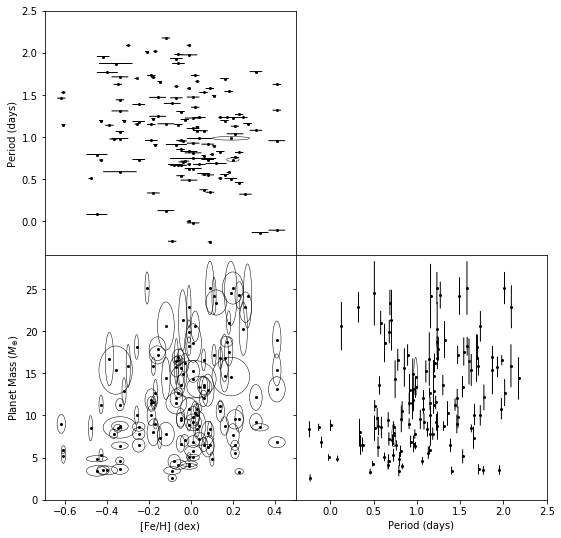

In [31]:
#ic = np.arange(50)
#feh = feh[ic]
#erfeh = erfeh[ic]
#period = period[ic]
#erperiod = erperiod[ic]
#mass_e = mass_e[ic]
#ermassl = ermassl[ic]

from itertools import product
from matplotlib.patches import Ellipse
# A helper function to make the plots with error ellipses
def plot_error_ellipses(ax, X, S, color="k"):
    for n in range(len(X)):
        vals, vecs = np.linalg.eig(S[n])
        theta = np.degrees(np.arctan2(*vecs[::-1, 0]))
        w, h = 2 * np.sqrt(vals)
        ell = Ellipse(xy=X[n], width=w, height=h,
                      angle=theta, color=color, lw=0.5)
        ell.set_facecolor("none")
        ax.add_artist(ell)
    ax.plot(X[:, 0], X[:, 1], ".", color=color, ms=4)


# Generate the coordinates of the data points from the data
N = len(feh)
X = np.empty((N, 3))

X[:,0] = feh
X[:,1] = np.log10(period)
X[:,2] = mass_e


# Generate error ellipses and add uncertainties to each point.
S = np.zeros((N, 3, 3))
for n in range(N):
    L = np.zeros((3, 3))
    L[0,0] = erfeh[n]
# error on log period
    L[1,1] = np.log10(period[n]+erperiod[n]) - np.log10(period[n])
    L[2,2] = ermassl[n]
#   no dependences on the errors of the different variables
#    L[np.tril_indices_from(L, -1)] = 0.5 * np.random.randn()
    L[np.tril_indices_from(L, -1)] = 0
    S[n] = np.dot(L, L.T)
    
# Plot the simulated dataset.
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
for xi, yi in product(range(3), range(3)):
    if yi <= xi:
        continue
    ax = axes[yi-1, xi]
    plot_error_ellipses(ax, X[:, [xi, yi]],
                        S[:,
                          [[xi, xi], [yi, yi]],
                          [[xi, yi], [xi, yi]]])
    
axes[0,0].set_xlim(-0.7, 0.5)
axes[1,0].set_xlim(-0.7, 0.5)
axes[0,0].set_ylim(-0.4, 2.5)
axes[1,0].set_ylim(0, 29)
axes[1,1].set_ylim(0, 29)
axes[1,1].set_xlim(-0.4, 2.5)

# Make the plots look nicer...
ax = axes[0, 1]
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

ax = axes[0, 0]
ax.set_ylabel("Period (days)")
ax.set_xticklabels([])
ax = axes[1, 0]
ax.set_xlabel("[Fe/H] (dex)")
ax.set_ylabel("Planet Mass ($M_{\oplus}$)")
ax = axes[1, 1]
ax.set_xlabel("Period (days)")
ax.set_yticklabels([])
fig.subplots_adjust(wspace=0, hspace=0)

9031 independent samples of m1
9187 independent samples of m2
8952 independent samples of b


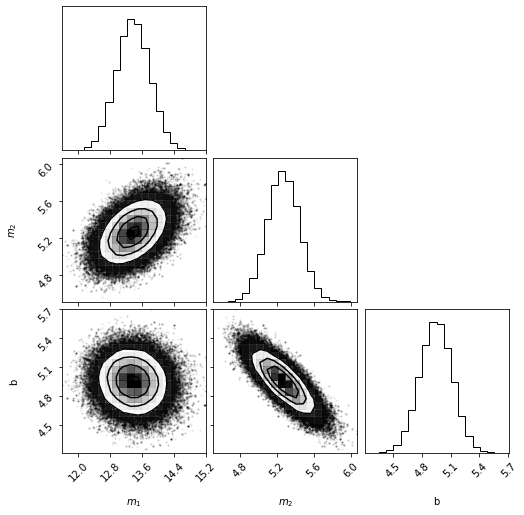

In [32]:
import emcee
import corner
def log_prob_D(params):
    m = params[:2]
    b = params[2:]
    v = np.append(-m, 1.0)
            
    # Compute \Sigma^2 and \Delta.
    Sigma2 = np.dot(np.dot(S, v), v)
    Delta = np.dot(X, v) - b
    
    # Compute the log likelihood up to a constant.
    ll = -0.5 * np.sum(Delta**2 / Sigma2 + np.log(Sigma2))
    return ll

nwalkers = 64
# Run the MCMC.
sampler_D = emcee.EnsembleSampler(nwalkers, 3, log_prob_D)
p0 = np.append(0, [0, np.log(1)])
p0 = p0 + 1e-4 * np.random.randn(nwalkers, len(p0))
pos, _, _ = sampler_D.run_mcmc(p0, 500)
sampler_D.reset()
sampler_D.run_mcmc(pos, 5000)
samples_D = sampler_D.flatchain

tau = sampler_D.get_autocorr_time(c=4)
nsamples = len(samples_D)
print("{0:.0f} independent samples of m1".format(nsamples / tau[0]))
print("{0:.0f} independent samples of m2".format(nsamples / tau[1]))
print("{0:.0f} independent samples of b".format(nsamples / tau[2]))
#print("{0:.0f} independent samples of ln(lambda)".format(nsamples / tau[3]))

#corner.corner(samples_D, labels=["$m_1$", "$m_2$", "b", "$\ln\lambda$"],
#              truths=np.append(m_true, [b_true, np.log(lambda_true)]));
corner.corner(samples_D, labels=["$m_1$", "$m_2$", "b"]);

In [33]:
samples_D.shape
print(np.mean(samples_D, axis=0))
print(np.std(samples_D, axis=0))

[13.36680671  5.26817472  4.94619586]
[0.4225522  0.17274196 0.16884291]


In [34]:
data.columns

Index(['name', 'swname', 'mass', 'mass_error_max', 'mass_sini',
       'mass_sini_error_max', 'mass_taken', 'mass_taken_error',
       'orbital_period', 'orbital_period_error_max',
       'orbital_period_error_min', 'swfeh', 'swefeh', 'swteff', 'pl_source',
       'swsource', 'swMass'],
      dtype='object')

0.5
248
443
Statistics for planet-hosts samples
A-D statistic: 18.01; p-value: 1.00e-03
K-S statistic:  0.17; p-value: 1.03e-04
Statistics for planet-hosts samples
A-D statistic: 74.63; p-value: 1.00e-03
K-S statistic:  0.40; p-value: 2.89e-15


<ipython-input-35-576b22b91585>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100
<ipython-input-35-576b22b91585>:50: UserWarning: p-value floored: true value smaller than 0.001
  ad_test = stats.anderson_ksamp([data_hotm.swfeh,data_coldm.swfeh])
<ipython-input-35-576b22b91585>:73: UserWarning: p-value floored: true value smaller than 0.001
  ad_test = stats.anderson_ksamp([data_hotm.mass_taken,data_coldm.mass_taken])


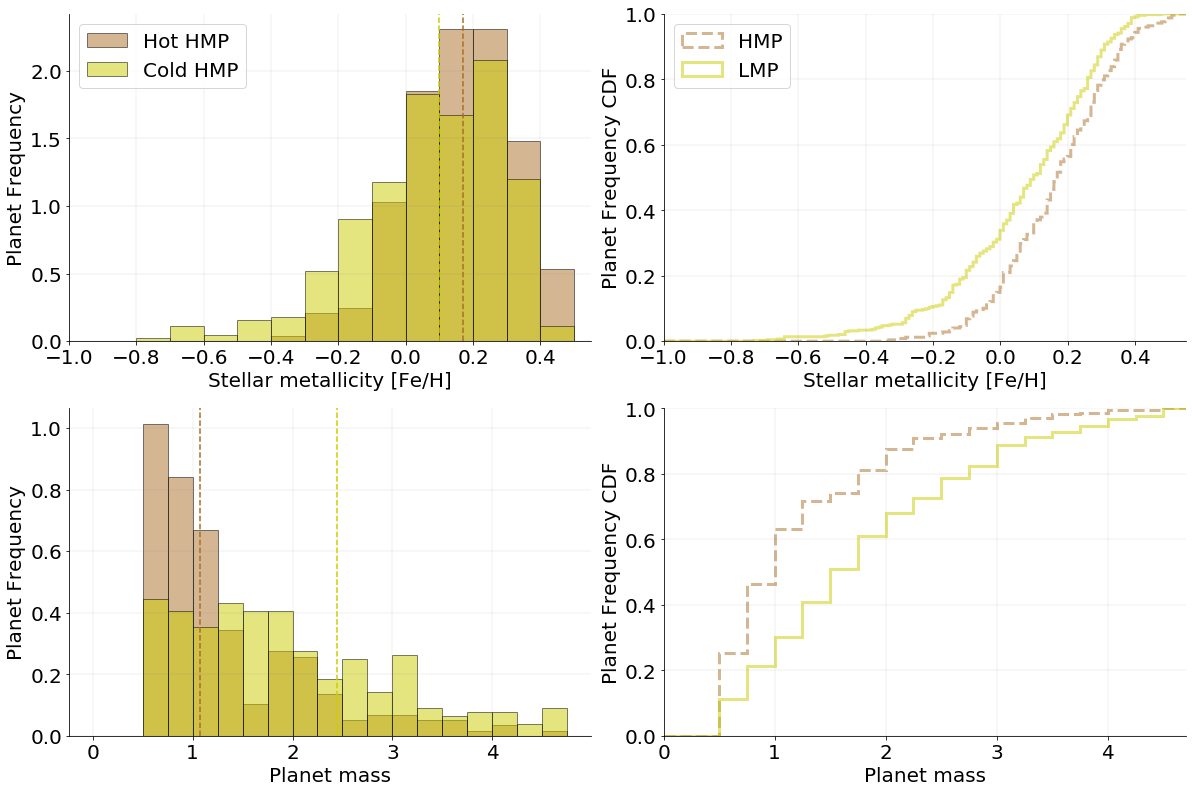

In [35]:
def hot_vs_cold_massive_planets(data_rdb, homog=1, msplit=30, psplit=40 , color_choice=1, field_mass="mass_taken", field_period='orbital_period', mass_error_perc=100):
  data_homog = data_rdb[data_rdb['swsource'] == 1]

  data_set = data_rdb
  if homog:
    data_set = data_homog

  mass_earth = 1. / 317.8  #jupiter masses
  mass_split = msplit * mass_earth
  msplit = mass_split
  msplit = 0.5
  print(msplit)
  msplit_o = 100
  data_set = data_set[ (data_set['swteff']>4500) & (data_set['swfeh'].notnull()) & (data_set[field_mass].notnull())]
  data_set["er_mass_per"] = data_set['mass_taken_error']/data_set['mass_taken']*100

  data_hotm = data_set[(data_set[field_mass] >= msplit) & (data_set[field_mass] < msplit_o) & (data_set[field_period] < psplit) & (data_set["er_mass_per"] < mass_error_perc)]
#  data_highm = data_set[np.where(data_set[field_mass] >= mass_split)]
  data_coldm = data_set[(data_set[field_mass] >= msplit) & (data_set[field_mass] < msplit_o) & (data_set[field_period] >= psplit)]
  print(len(data_hotm))
  print(len(data_coldm))
    
  color_b = (205./255.,205./255., 0./255.)
  color_r = (170./255., 110./255., 40./255.)

  fig = plt.figure(figsize=(1200*px,800*px))
  ax1 = fig.add_subplot(221)
  ax2 = fig.add_subplot(222)
  ax3 = fig.add_subplot(223)
  ax4 = fig.add_subplot(224)

  ax1.hist(data_hotm.swfeh, bins=np.arange(-1.0, 0.6, 0.1), color = color_r, alpha=0.5, density=True, label = "Hot HMP", ec='black')
  ax1.hist(data_coldm.swfeh, bins=np.arange(-1.0, 0.6, 0.1), color = color_b, alpha=0.5, density=True, label = "Cold HMP", ec='black')

  ax1.axvline(np.median(data_hotm.swfeh), color=color_r, linestyle ='--')
  ax1.axvline(np.median(data_coldm.swfeh), color=color_b, linestyle ='--')
  ax1.set_xlabel('Stellar metallicity [Fe/H]')
  ax1.set_ylabel('Planet Frequency')
#    fig.suptitle("Distribution per planets", fontsize=16)
  ax1.legend(loc=2, fontsize=20)

  ax2.hist(data_hotm.swfeh, bins=np.arange(-1.0, 0.6, 0.001), color = color_r, alpha=0.5, density=True, label = "HMP", histtype='step', cumulative=True, linewidth = 3, linestyle ='--')
  ax2.hist(data_coldm.swfeh, bins=np.arange(-1.0, 0.6, 0.001), color = color_b, alpha=0.5, density=True, label = "LMP"  , histtype='step', cumulative=True, linewidth = 3)
  ax2.set_xlabel('Stellar metallicity [Fe/H]')
  ax2.set_ylabel('Planet Frequency CDF')
  ax2.legend(loc=2, fontsize=20)
  ax2.set_ylim(0,1)
  ax1.set_xlim(-1,0.55)
  ax2.set_xlim(-1,0.55)
  ad_test = stats.anderson_ksamp([data_hotm.swfeh,data_coldm.swfeh])
  ks_test = stats.ks_2samp(data_hotm.swfeh,data_coldm.swfeh)
  print("Statistics for planet-hosts samples")
  print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue))

  ax3.hist(data_hotm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_r, alpha=0.5, density=True, label = "Hot HMP", ec='black')
  ax3.hist(data_coldm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_b, alpha=0.5, density=True, label = "Cold HMP", ec='black')

  ax3.axvline(np.median(data_hotm.mass_taken), color=color_r, linestyle ='--')
  ax3.axvline(np.median(data_coldm.mass_taken), color=color_b, linestyle ='--')
  ax3.set_xlabel('Planet mass')
  ax3.set_ylabel('Planet Frequency')
#    fig.suptitle("Distribution per planets", fontsize=16)

  ax4.hist(data_hotm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_r, alpha=0.5, density=True, label = "HMP", histtype='step', cumulative=True, linewidth = 3, linestyle ='--')
  ax4.hist(data_coldm.mass_taken, bins=np.arange(0, 5, 0.25), color = color_b, alpha=0.5, density=True, label = "LMP"  , histtype='step', cumulative=True, linewidth = 3)
  ax4.set_xlabel('Planet mass')
  ax4.set_ylabel('Planet Frequency CDF')
  #ax4.legend(loc=2, fontsize=20)
  ax4.set_ylim(0,1)
  #ax1.set_xlim(-1,0.55)
  ax4.set_xlim(0,4.7)
  ad_test = stats.anderson_ksamp([data_hotm.mass_taken,data_coldm.mass_taken])
  ks_test = stats.ks_2samp(data_hotm.mass_taken,data_coldm.mass_taken)
  print("Statistics for planet-hosts samples")
  print("A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level))
  print("K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue))


  for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(20)

  # ax2.text(0.02,0.75,"A-D statistic: %5.2f; p-value: %5.2e" % (ad_test.statistic, ad_test.significance_level),transform=ax2.transAxes)
  # ax2.text(0.02,0.70,"K-S statistic: %5.2f; p-value: %5.2e" % (ks_test.statistic, ks_test.pvalue),transform=ax2.transAxes)
  fig.tight_layout()
  fig.savefig("hot_cold_jupiters.png")
  plt.show()
    
    
    
    
hot_vs_cold_massive_planets(data)

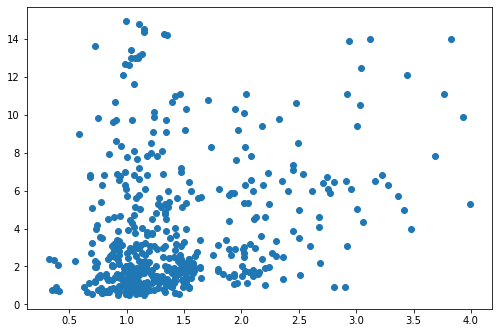

In [36]:
data_mass = data[(data.swMass>0) & (data.mass_taken > 0.5) & (data.mass_taken < 15) & (data.orbital_period >= 40)]

fig = plt.figure(figsize=(600*px,400*px))
ax1 = fig.add_subplot(111)
#ax1.hist(data_mass.swMass, bins=np.arange(0, 4, 0.1))
ax1.scatter(data_mass.swMass, data_mass.mass_taken)


https://arxiv.org/pdf/1705.06090.pdf